# Social Network Analysis 


We're analyzing Jordan’s road network as a graph to:

1. Find important intersections using centrality metrics.

2. These metrics help answer:

        - Which intersections are well connected?
        - Which are closest to all others?
        - Which act as critical bridges in traffic flow?


In [ ]:
 # pip install osmnx networkx pandas matplotlib geopandas


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing necessary libraries 

import osmnx as ox # Access and process real-world street networks from OpenStreetMap
import networkx as nx # flexible, extensible, and powerful network analysis tool
import pandas as pd # data analysis and manipulation tool
import matplotlib.pyplot as plt # visualizations

In [2]:
# Step 1: Load the Jordan road network
place_name = "Jordan"
G = ox.graph_from_place(place_name, network_type='all', simplify=True)



#ox.graph_from_place(...) to downloads the road network 
#Nodes = intersections, Edges = road segments.

""" Parameters:
    network_type='all' : Includes all types of paths: roads, footpaths, service lanes.... 
    simplify=True: Merges intermediate nodes (like bend points) so each road segment is a clean edge between intersections.
Makes the graph more usable for centrality and routing analysis."""



/Users/masaaladwan/.pyenv/versions/3.11.6/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 48 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


KeyboardInterrupt: 

In [13]:
G.size()

641595

Then that means your road network has over 640,000 nodes (intersections)  which is very large , lets focus on amman 
I've been running the code for more than 12 hours, so for this project i will simplfy it more 


In [3]:
G_amman = ox.graph_from_place("Amman, Jordan", network_type='drive', simplify=True)

In [4]:
G_amman.size()

156456

Thats so much better, still it will be slow for betweenes centrality 

In [10]:
# Step 2: Convert to undirected 
G_undirected = G.to_undirected()


# why u may ask ? becaues the method i want to use is much faster when its used to process undirected graphs
# Assuming symmetrical movement is often OK for large-scale analysis
# If you care about direction (like for routing or smth), keep the original directed graph G 

In [5]:
G_undirected_amman = G_amman.to_undirected()
G_undirected_amman.size()

89336

In [11]:
# Step 3: Compute centralities
degree_centrality = nx.degree_centrality(G_undirected)

# Degree centrality counts direct connections only it says how many roads meet at a junction.
# But it says nothing about: How central the location is to the entire network ?  Whether it lies on important travel routes between cities or not 
# basically it only cares about the number of roads that connect to a node, not how important that node is to the network as a whole., NO GLOBAL IMPORTANCE
# so we use other centrality measures to get a more complete picture of a node's importance in the network.


In [6]:
degree_centrality_amman = nx.degree_centrality(G_undirected_amman)


In [12]:
closeness_centrality = nx.closeness_centrality(G_undirected, distance='length')

# Useful for identifying the most accessible locations ,helps planners find where to place services like emergency stations..... 
# How close it is to all other intersections, based on the shortest path distances in the network.

KeyboardInterrupt: 

In [7]:
closeness_centrality_amman = nx.closeness_centrality(G_undirected_amman, distance='length')


KeyboardInterrupt: 

In [9]:
import random

sample_nodes = random.sample(list(G_undirected_amman.nodes()), 1000)

closeness_centrality_amman = {}
N = len(G_undirected_amman)

for node in sample_nodes:
    path_lengths = nx.single_source_dijkstra_path_length(G_undirected_amman, node, weight='length')
    total_dist = sum(path_lengths.values())

    # Compute normalized closeness manually
    if total_dist > 0 and len(path_lengths) > 1:
        closeness = (len(path_lengths) - 1) / total_dist
        # Normalize by expected range
        closeness *= (len(path_lengths) - 1) / (N - 1)
        closeness_centrality_amman[node] = closeness

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G_undirected, weight='length', normalized=True)

In [10]:
betweenness_centrality_amman = nx.betweenness_centrality(G_undirected_amman, weight='length', normalized=True, k=1000)

In [ ]:
# Step 4: Assign attributes
nx.set_node_attributes(G_undirected, degree_centrality, 'degree_centrality')



In [11]:
nx.set_node_attributes(G_undirected_amman, degree_centrality_amman, 'degree_centrality')



In [ ]:
nx.set_node_attributes(G_undirected, closeness_centrality, 'closeness_centrality')


In [12]:
nx.set_node_attributes(G_undirected_amman, closeness_centrality_amman, 'closeness_centrality')


In [ ]:
nx.set_node_attributes(G_undirected, betweenness_centrality, 'betweenness_centrality', k=1000, normalized=True)

In [14]:
nx.set_node_attributes(G_undirected_amman, betweenness_centrality_amman, 'betweenness_centrality')

In [ ]:

# Step 5: Visualize betweenness
nc = ox.plot.get_node_colors_by_attr(G_undirected, attr='betweenness_centrality', cmap='plasma')


In [15]:
nc = ox.plot.get_node_colors_by_attr(G_undirected_amman, attr='betweenness_centrality', cmap='plasma')


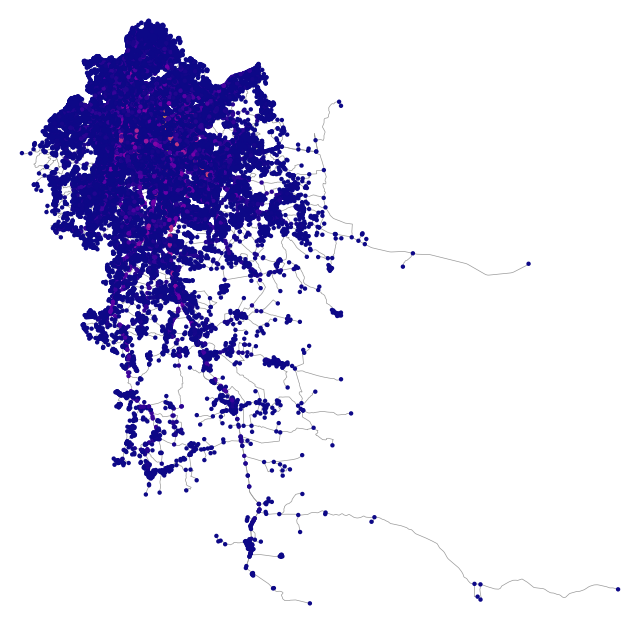

In [17]:
fig, ax = ox.plot_graph(G_undirected_amman, node_color=nc, node_size=10, edge_linewidth=0.5, bgcolor='white')


In [18]:

# Step 6: Export results (NEW API)
nodes, edges = ox.graph_to_gdfs(G_undirected_amman)
nodes.to_csv("jordan_nodes_centrality.csv")
edges.to_csv("jordan_edges.csv")
nodes.to_file("jordan_nodes_centrality.shp")
edges.to_file("jordan_edges.shp")


/var/folders/v8/l1_1hkns6bzgr_mh923vgcbh0000gn/T/ipykernel_7093/2906963309.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nodes.to_file("jordan_nodes_centrality.shp")
/Users/masaaladwan/.pyenv/versions/3.11.6/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'street_count' to 'street_cou'
  ogr_write(
/Users/masaaladwan/.pyenv/versions/3.11.6/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'degree_centrality' to 'degree_cen'
  ogr_write(
/Users/masaaladwan/.pyenv/versions/3.11.6/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'betweenness_centrality' to 'betweennes'
  ogr_write(
/Users/masaaladwan/.pyenv/versions/3.11.6/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'closeness_centrality' to 'closeness_'
  ogr_write(


In [20]:
# Step 7: Print top 5 by betweenness
top_btwn = sorted(betweenness_centrality_amman.items(), key=lambda x: x[1], reverse=True)[:5]
for node, score in top_btwn:
    print(f"Node {node}: Betweenness = {score}, Lat = {G_undirected_amman.nodes[node]['y']}, Lon = {G_undirected_amman.nodes[node]['x']}")

Node 6243197230: Betweenness = 0.11032687934203919, Lat = 31.9073749, Lon = 35.9379639
Node 6643336563: Betweenness = 0.11022652831999608, Lat = 31.9061359, Lon = 35.9374064
Node 6574850988: Betweenness = 0.11019357036324719, Lat = 31.9067605, Lon = 35.9376583
Node 274288588: Betweenness = 0.10820665824683992, Lat = 31.9500463, Lon = 35.9344756
Node 1642821184: Betweenness = 0.10811669493742995, Lat = 31.9494426, Lon = 35.9342113


In [29]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="sna_project")

print("Top 5 Nodes with Addresses:")
for node, score in top_btwn:
    lat = G_undirected_amman.nodes[node]['y']
    lon = G_undirected_amman.nodes[node]['x']
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True, language='en')
        address = location.address if location else "No address found"
    except Exception as e:
        address = f"Error: {e}"
    print(f"\nNode {node}:")
    print(f"  Betweenness Score: {score:.3f}")
    print(f"  Latitude: {lat:.6f}")
    print(f"  Longitude: {lon:.6f}")
    print(f"  Address: {address}")
    time.sleep(1)  # Be polite to the API!

Top 5 Nodes with Addresses:

Node 6243197230:
  Betweenness Score: 0.110
  Latitude: 31.907375
  Longitude: 35.937964
  Address: أم الحيران, Amman, Amman Sub-District, Amman Qasabah District, Amman, 11019, Jordan

Node 6643336563:
  Betweenness Score: 0.110
  Latitude: 31.906136
  Longitude: 35.937406
  Address: Prince Al-Hasan Street, أم الحيران, Amman, Amman Sub-District, Amman Qasabah District, Amman, 11019, Jordan

Node 6574850988:
  Betweenness Score: 0.110
  Latitude: 31.906761
  Longitude: 35.937658
  Address: Prince Al-Hasan Street, أم الحيران, Amman, Amman Sub-District, Amman Qasabah District, Amman, 11019, Jordan

Node 274288588:
  Betweenness Score: 0.108
  Latitude: 31.950046
  Longitude: 35.934476
  Address: Basman Street, Jabal Amman, منطقة المدينة, Amman, Amman Sub-District, Amman Qasabah District, Amman, 11110, Jordan

Node 1642821184:
  Betweenness Score: 0.108
  Latitude: 31.949443
  Longitude: 35.934211
  Address: Petra Street, Jabal Amman, منطقة المدينة, Amman, Amma

In [30]:
...

# Compute top 5 nodes for each centrality
betweenness_top5 = sorted(betweenness_centrality_amman.items(), key=lambda x: x[1], reverse=True)[:5]
degree_top5 = sorted(degree_centrality_amman.items(), key=lambda x: x[1], reverse=True)[:5]
closeness_top5 = sorted(closeness_centrality_amman.items(), key=lambda x: x[1], reverse=True)[:5]

def get_node_info(node, centrality_dict, G):
    return {
        'Node': node,
        'Score': centrality_dict[node],
        'Latitude': G.nodes[node]['y'],
        'Longitude': G.nodes[node]['x']
    }

betweenness_df = pd.DataFrame([get_node_info(n, betweenness_centrality_amman, G_undirected_amman) for n, _ in betweenness_top5])
degree_df = pd.DataFrame([get_node_info(n, degree_centrality_amman, G_undirected_amman) for n, _ in degree_top5])
closeness_df = pd.DataFrame([get_node_info(n, closeness_centrality_amman, G_undirected_amman) for n, _ in closeness_top5])

print("Top 5 by Betweenness Centrality:")
print(betweenness_df)
print("\nTop 5 by Degree Centrality:")
print(degree_df)
print("\nTop 5 by Closeness Centrality:")
print(closeness_df)


Top 5 by Betweenness Centrality:
         Node     Score   Latitude  Longitude
0  6243197230  0.110327  31.907375  35.937964
1  6643336563  0.110227  31.906136  35.937406
2  6574850988  0.110194  31.906761  35.937658
3   274288588  0.108207  31.950046  35.934476
4  1642821184  0.108117  31.949443  35.934211

Top 5 by Degree Centrality:
         Node     Score   Latitude  Longitude
0   332572834  0.000095  31.948156  35.915215
1   472392440  0.000095  31.864345  35.821840
2  1517886849  0.000095  31.959762  35.922359
3  1628631499  0.000095  31.860224  36.017236
4  1651982483  0.000095  32.037832  35.896487

Top 5 by Closeness Centrality:
         Node     Score   Latitude  Longitude
0  1709341890  0.000076  31.921585  35.938317
1  6661258745  0.000076  31.922514  35.941011
2  6647010052  0.000076  31.935780  35.930562
3  6661258744  0.000076  31.921481  35.941612
4  1710385246  0.000075  31.924766  35.941299


In [32]:
import numpy as np
impact_results = []
for node, score in betweenness_top5:
    G_temp = G_undirected_amman.copy()
    G_temp.remove_node(node)
    n_components = nx.number_connected_components(G_temp)
    # Compute average shortest path length if the graph is still connected
    if n_components == 1:
        avg_path_length = nx.average_shortest_path_length(G_temp, weight='length')
    else:
        avg_path_length = np.nan
    impact_results.append({
        'Removed Node': node,
        'Betweenness Score': score,
        'Connected Components': n_components,
        'Avg Shortest Path Length': avg_path_length
    })

impact_df = pd.DataFrame(impact_results)
print("\nImpact of Removing Top Betweenness Nodes:")
print(impact_df)


KeyboardInterrupt: 

In [33]:
import random

def sampled_avg_shortest_path_length(G, sample_size=200):
    nodes = list(G.nodes)
    lengths = []
    for _ in range(sample_size):
        u, v = random.sample(nodes, 2)
        try:
            length = nx.shortest_path_length(G, u, v, weight='length')
            lengths.append(length)
        except nx.NetworkXNoPath:
            continue
    return np.mean(lengths) if lengths else np.nan

impact_results = []
for node, score in betweenness_top5:
    G_temp = G_undirected_amman.copy()
    G_temp.remove_node(node)
    n_components = nx.number_connected_components(G_temp)
    if n_components == 1:
        avg_path_length = sampled_avg_shortest_path_length(G_temp, sample_size=200)
    else:
        avg_path_length = np.nan
    impact_results.append({
        'Removed Node': node,
        'Betweenness Score': score,
        'Connected Components': n_components,
        'Avg Shortest Path Length (sampled)': avg_path_length
    })

impact_df = pd.DataFrame(impact_results)
print("\nImpact of Removing Top Betweenness Nodes (Sampled):")
print(impact_df)


Impact of Removing Top Betweenness Nodes (Sampled):
   Removed Node  Betweenness Score  Connected Components  \
0    6243197230           0.110327                     1   
1    6643336563           0.110227                     1   
2    6574850988           0.110194                     1   
3     274288588           0.108207                     1   
4    1642821184           0.108117                     1   

   Avg Shortest Path Length (sampled)  
0                        19672.226372  
1                        20299.674867  
2                        19784.295761  
3                        19620.439539  
4                        20363.832159  


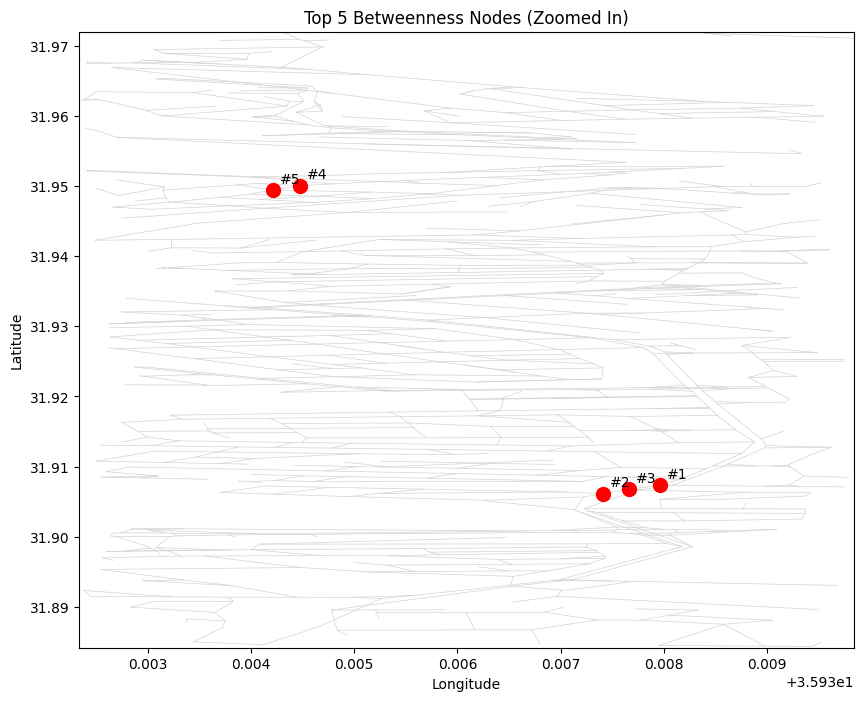

Average pairwise distance between top 5 nodes: 2.90 km


In [36]:
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Get coordinates of top 5 nodes
top_coords = [(G_undirected_amman.nodes[node]['y'], G_undirected_amman.nodes[node]['x']) for node, _ in betweenness_top5]

# Calculate bounding box with margin
lats = [lat for lat, lon in top_coords]
lons = [lon for lat, lon in top_coords]
lat_margin = (max(lats) - min(lats)) * 0.5 or 0.01
lon_margin = (max(lons) - min(lons)) * 0.5 or 0.01

lat_min = min(lats) - lat_margin
lat_max = max(lats) + lat_margin
lon_min = min(lons) - lon_margin
lon_max = max(lons) + lon_margin

# Plot the network (edges only for speed)
fig, ax = plt.subplots(figsize=(10, 8))
for u, v in G_undirected_amman.edges():
    x = [G_undirected_amman.nodes[u]['x'], G_undirected_amman.nodes[v]['x']]
    y = [G_undirected_amman.nodes[u]['y'], G_undirected_amman.nodes[v]['y']]
    # Only plot edges within the bounding box for speed and clarity
    if (lat_min <= y[0] <= lat_max and lat_min <= y[1] <= lat_max and
        lon_min <= x[0] <= lon_max and lon_min <= x[1] <= lon_max):
        ax.plot(x, y, color='lightgray', linewidth=0.5, zorder=1)

# Plot top nodes
for i, (lat, lon) in enumerate(top_coords, 1):
    ax.scatter(lon, lat, c='red', s=100, zorder=2)
    ax.annotate(f'#{i}', (lon, lat), textcoords='offset points', xytext=(5,5), fontsize=10, color='black')

ax.set_title('Top 5 Betweenness Nodes (Zoomed In)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
plt.show()

# Calculate average pairwise distance (in km) between top nodes
distances = []
for i in range(len(top_coords)):
    for j in range(i+1, len(top_coords)):
        distances.append(geodesic(top_coords[i], top_coords[j]).km)
avg_distance = sum(distances) / len(distances)
print(f"Average pairwise distance between top 5 nodes: {avg_distance:.2f} km")

In [37]:
! pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/32/42/9d1c6fe6478e14feca0d33c2a2a2d4c84de01eeb6c61cf707eda9532b4d8/folium-0.19.6-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for xyzservices from https://files.pythonhosted.org/packages/d6/7d/b77455d7c7c51255b2992b429107fab811b2e36ceaf76da1e55a045dc568/xyzservices-2025.4.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 15.1 kB/s eta 0:00:00 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 60.7 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [38]:
import folium

# Center map on the mean location of top nodes
center_lat = sum(lat for lat, lon in top_coords) / len(top_coords)
center_lon = sum(lon for lat, lon in top_coords) / len(top_coords)
m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

# Add top nodes as markers
for i, (lat, lon) in enumerate(top_coords, 1):
    folium.Marker(
        location=[lat, lon],
        popup=f"Top #{i}<br>Lat: {lat:.6f}<br>Lon: {lon:.6f}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

m.save('results/visualizations/top_nodes_map.html')
m  # In Jupyter, this will display the map